# Incremental triangulation algorithm

## Imports

In [519]:
import numpy as np # For calculating determinants
import matplotlib.pyplot as plt
import math # For arctan

## Sort points in anticlockwise order

The test below for whether a point lies within a circle circumscribing a triangle will only work if the vertices of that triangle are sorted in anticlockwise order.

In [520]:
def theta(x, y):
    
    if (x == 0 and y >= 0):
        return math.pi * 0.5
    elif (x == 0 and y  0):
        return math.pi * 0.75
    else:   
        if (x >= 0 and y >= 0): # First quadrant
            return math.atan(y/x)
        elif (x < 0 and y >= 0): # Second quadrant
            return math.atan(y/x) + math.pi
        elif (x < 0 and y < 0): # Third quadrant
            return math.atan(y/x) + math.pi
        elif (x >= 0 and y < 0): # Fourth quadrant
            return math.atan(y/x) + math.pi*2

In [521]:
def theta(x, y):
    
    if (x == 0 and y >= 0):
        return math.pi * (1/2)
    elif (x == 0 and y < 0):
        return math.pi * (3/2)
    else:   
        if (x >= 0 and y >= 0): # First quadrant
            return math.atan(y/x)
        elif (x < 0 and y >= 0): # Second quadrant
            return math.atan(y/x) + math.pi
        elif (x < 0 and y < 0): # Third quadrant
            return math.atan(y/x) + math.pi
        elif (x >= 0 and y < 0): # Fourth quadrant
            return math.atan(y/x) + math.pi*2

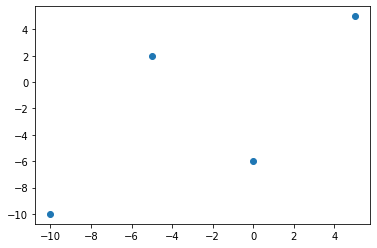

In [522]:
points = [(-10,-10), (-5, 2), (0,-6), (5,5)]

plt.scatter([i[0] for i in points], [i[1] for i in points])
plt.show()

In [523]:
print(sort(points))

[(5, 5), (-5, 2), (-10, -10), (0, -6)]


## Test of whether a point is in a circle circumscribing a triangle

The algorithm implement depends on a test for whether a given node is inside of a circle circumscribing the triangle connecting three other nodes. In a valid triangulation, no node can be inside such a circle for any triangles, other than the nodes at the vertices of that triangle.

Examples are given below showing plots of the tests.

In [524]:
# Is s within the circle cimcumscribing abc?
def withinCircle(s, a, b, c):
    
    # For this definition to be valid, abc must be sorted anticlockwise
    vertices = [a,b,c]
    p, q, r = sort(vertices)
    
    sx = s[0]
    sy = s[1]
    px = p[0]
    py = p[1]
    qx = q[0]
    qy = q[1]
    rx = r[0]
    ry = r[1]
    
    arr = np.array([
        [px, py, px**2+py**2, 1],
        [qx, qy, qx**2+qy**2, 1],
        [rx, ry, rx**2+ry**2, 1],
        [sx, sy, sx**2+sy**2, 1]
    ])
    
    return np.linalg.det(arr) >= 0

In [525]:
def inspect_circumcircle_tests(points, triangle):
    a, b, c = triangle

    for point in points:
        print(point, "is within circle?", withinCircle(point, a, b, c))
    
    x_vals_1 = [a[0], b[0]]
    y_vals_1 = [a[1], b[1]]
    x_vals_2 = [b[0], c[0]]
    y_vals_2 = [b[1], c[1]]
    x_vals_3 = [c[0], a[0]]
    y_vals_3 = [c[1], a[1]]

    plt.plot(x_vals_1, y_vals_1)
    plt.plot(x_vals_2, y_vals_2)
    plt.plot(x_vals_3, y_vals_3)
    
    plt.scatter([i[0] for i in points], [i[1] for i in points])

    for point in points:
        x, y = point
        plt.text(x+0.1, y+0.1, str(withinCircle(point, a, b, c)))

    plt.show()

(3, 1) is within circle? False
(1, 4) is within circle? False
(2, 3) is within circle? False
(0, 1) is within circle? True
(1, 1) is within circle? True
(1.5, 1.5) is within circle? True
(1.5, 2.5) is within circle? True
(-0.5, -0.5) is within circle? True


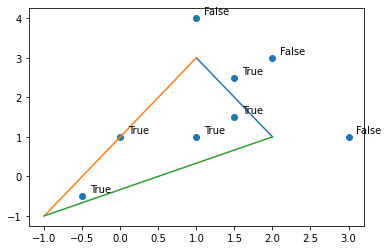

In [526]:
triangle = {(-1,-1), (1,3), (2,1)}
points = [(3,1), (1,4), (2,3), (0,1), (1,1), (1.5, 1.5), (1.5,2.5), (-0.5, -0.5)]

inspect_circumcircle_tests(points, triangle)

[1, 1] is within circle? True
[-2, -2] is within circle? False
[0, 0] is within circle? True


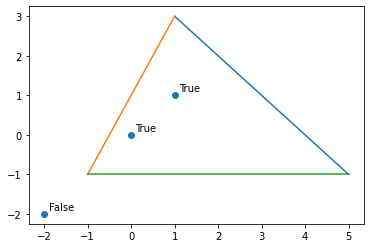

In [527]:
triangle = {(-1,-1),(1,3),(5,-1)}
points = [[1,1], [-2,-2], [0,0]]

inspect_circumcircle_tests(points, triangle)

[1, 1] is within circle? True
[3, 3] is within circle? True
[0, 0] is within circle? False
[4, 6] is within circle? False
[2.5, 4] is within circle? True
[2, 5.5] is within circle? True


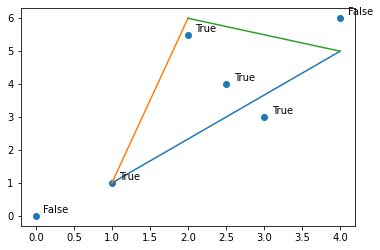

In [528]:
triangle = {(1,1),(4,5),(2,6)}
points = [[1,1], [3,3], [0,0], [4,6], [2.5,4], [2,5.5]]

inspect_circumcircle_tests(points, triangle)

## Generate random graph

In [529]:
import random

In [530]:
max_x = 2000
max_y = 2000
nodes = 50

graph = []

for node in range(0, nodes):
    x = random.randrange(0, max_x)
    y = random.randrange(0, max_y)
    
    graph.append((x,y))

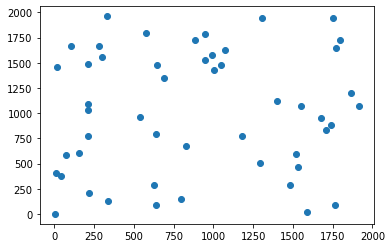

In [531]:
plt.scatter([i[0] for i in graph], [i[1] for i in graph])
plt.show()

## Generate a "super-triangle" which encloses all of the points

In [532]:
enclosing_triangle = {(-2000,-100), (4000,-100), (1000, 4000)}
a, b, c = enclosing_triangle

In [533]:
withinCircle(graph[0], a, b, c)

True

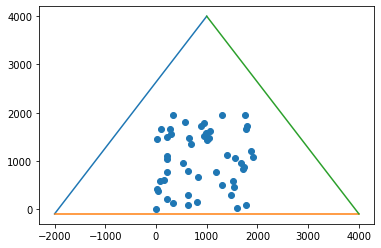

In [534]:
# Graph triangle

x_vals_1 = [a[0], b[0]]
y_vals_1 = [a[1], b[1]]
x_vals_2 = [b[0], c[0]]
y_vals_2 = [b[1], c[1]]
x_vals_3 = [c[0], a[0]]
y_vals_3 = [c[1], a[1]]

plt.plot(x_vals_1, y_vals_1)
plt.plot(x_vals_2, y_vals_2)
plt.plot(x_vals_3, y_vals_3)

plt.scatter([i[0] for i in graph], [i[1] for i in graph])
plt.show()

## Algorithm

In [535]:
# Algorithm

triangles = [enclosing_triangle]

for node in graph:
    
    #Find bad triangles
    badTriangles = []
    
    for triangle in triangles:
        p, q, r = triangle
        
        if withinCircle(node, p, q, r):
            badTriangles.append(triangle)
    
    # Find the boundaries of the polygonal hole
    polygon = []
    badEdges = []
    
    for triangle in badTriangles:
        a, b, c = triangle
        badEdges.append({a,b})
        badEdges.append({b,c})
        badEdges.append({a,c})
    
    frequencies = {}
    
    for edge in badEdges:
        edge = tuple(edge)
        if edge in frequencies.keys():
            frequencies[edge] = frequencies[edge] + 1
        else:
            frequencies[edge] = 1
            
    for key, val in frequencies.items():
        if val == 1:
            polygon.append(key)
            
    # Remove bad triangles from triangles
    for triangle in badTriangles:
        triangles.remove(triangle)
    
    # Re-triangulate the polygonal hole
    for edge in polygon:
        a, b = edge
        newTriangle = {a, b, node}
        triangles.append(newTriangle)
        
# Clean up
# If a triangle contains a vertex from the super-triangle, remove it

scaffolding = []

for triangle in triangles:
    for vertex in triangle:
        if vertex in enclosing_triangle:
            if triangle not in scaffolding:
                scaffolding.append(triangle)
                
for triangle in scaffolding:
    triangles.remove(triangle)

## Visualise the results

In [536]:
def drawTriangles(triangles):
    for triangle in triangles:
        a,b,c = triangle
    
        x_vals_1 = [a[0], b[0]]
        y_vals_1 = [a[1], b[1]]
        x_vals_2 = [b[0], c[0]]
        y_vals_2 = [b[1], c[1]]
        x_vals_3 = [c[0], a[0]]
        y_vals_3 = [c[1], a[1]]

        plt.plot(x_vals_1, y_vals_1)
        plt.plot(x_vals_2, y_vals_2)
        plt.plot(x_vals_3, y_vals_3)
    
    plt.show()

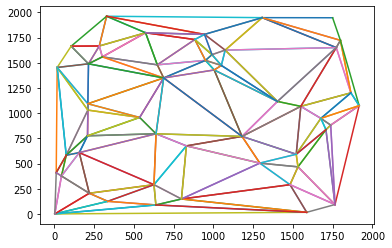

In [537]:
drawTriangles(triangles)

## Test each part of the algorithm

### Polygonal holes

In [538]:
tri1 = {(0,2), (0,5), (2,3)}
tri2 = {(0,2), (2,3), (2,1)}
tri3 = {(0,5), (2,3), (3,5)}
triangles = [tri1, tri2, tri3]

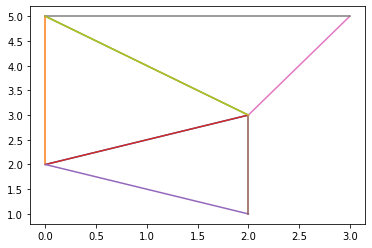

In [539]:
drawTriangles(triangles)

In [540]:
def polygon(triangles):
    sharedEdges = []
    edges = []
    
    for triangle in triangles:
        a, b, c = triangle
        sides = [{a,b}, {b,c}, {a,c}]
        
        for side in sides:
            if side in edges:
                sharedEdges.append(side)
            else:
                edges.append(side)
                
    for edge in sharedEdges:
        edges.remove(edge)
        
    return edges

In [541]:
hole = polygon(triangles)

In [542]:
def drawEdges(edges):
    for edge in edges:
        a,b = edge
        
        x_vals = [a[0], b[0]]
        y_vals = [a[1], b[1]]
        
        plt.plot(x_vals, y_vals)
        
    plt.show()

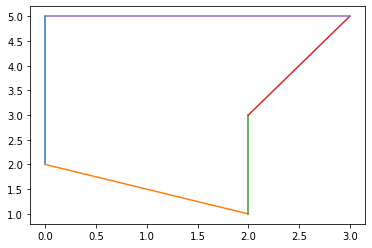

In [543]:
drawEdges(hole)

### Triangulating the polygonal hole

In [544]:
node = (1,4)

In [545]:
def triangulate(point, hole):
    triangles = []
    
    for edge in hole:
        a,b = edge
        newTriangle = {a,b,point}
        
        triangles.append(newTriangle)
        
    return triangles

In [546]:
triangulated = triangulate(node, hole)

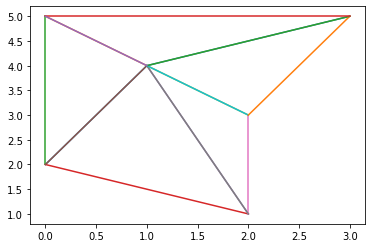

In [547]:
drawTriangles(triangulated)

### Bad triangles

In [548]:
def bad(node, triangles):
    
    badTriangles = []
    
    for triangle in triangles:
        a,b,c = triangle
        if withinCircle(node, a, b, c):
            badTriangles.append(triangle)
            
    return badTriangles

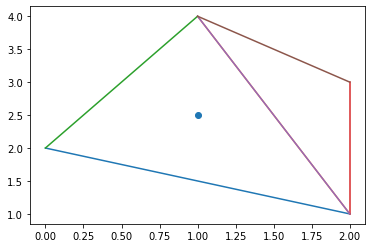

In [549]:
vertex = (1,2.5)
plt.scatter(vertex[0], vertex[1])
drawTriangles(bad(vertex, triangulated))